# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [45]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd #importa o pacote pandas

In [46]:
# grupo de amigos
galera = np.arange(3,15)
# guardar informacao de convergencia para cada grupo de amigos
converge_galera = {}
media_galera = {}
desvio_galera = {}
min_galera = {}
max_galera = {}
numero_interacoes = 50
# testa convergencia para cada grupo de amigos
for amigos in galera:
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print i,'converge'
                if converge_galera.has_key(amigos):
                    converge_galera[amigos].append(i)
                else:
                    converge_galera[amigos] = [i]
                break
    media_galera[amigos] = int(np.mean(converge_galera[amigos]))
    desvio_galera[amigos] = int(np.std(converge_galera[amigos]))
    min_galera[amigos] = int(np.min(converge_galera[amigos]))
    max_galera[amigos] = int(np.max(converge_galera[amigos]))


In [47]:
print media_galera
print desvio_galera
print min_galera
print max_galera

{3: 1, 4: 1, 5: 3, 6: 4, 7: 11, 8: 14, 9: 26, 10: 55, 11: 95, 12: 194, 13: 426, 14: 691}
{3: 0, 4: 1, 5: 2, 6: 4, 7: 11, 8: 13, 9: 28, 10: 52, 11: 85, 12: 201, 13: 396, 14: 712}
{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 6, 12: 1, 13: 28, 14: 3}
{3: 3, 4: 6, 5: 13, 6: 24, 7: 46, 8: 66, 9: 130, 10: 247, 11: 340, 12: 983, 13: 1699, 14: 3095}


In [48]:
##Ok, estamos vendo alguns valores importantes, porém, com o Pandas, esta visualização pode ser melhor:
print 'Valores médios :'

media_galera1= pd.Series(media_galera) 
media_galera1


Valores médios :


3       1
4       1
5       3
6       4
7      11
8      14
9      26
10     55
11     95
12    194
13    426
14    691
dtype: int64

In [49]:
print 'Desvio padrão :'

desvio_galera1 = pd.Series(desvio_galera)
desvio_galera1

Desvio padrão :


3       0
4       1
5       2
6       4
7      11
8      13
9      28
10     52
11     85
12    201
13    396
14    712
dtype: int64

In [34]:
print 'Valores mínimos :'

min_galera1= pd.Series(min_galera) 
min_galera1

Valores mínimos :


3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     5
13     1
14    31
dtype: int64

In [50]:
print 'Valores máximos :'

max_galera1 = pd.Series(max_galera)
max_galera1

Valores máximos :


3        3
4        6
5       13
6       24
7       46
8       66
9      130
10     247
11     340
12     983
13    1699
14    3095
dtype: int64

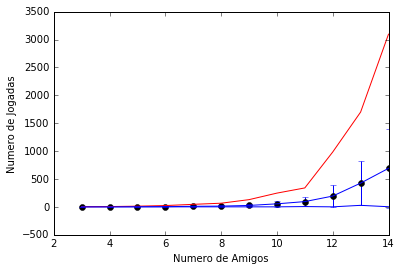

In [51]:
plt.plot(media_galera.keys(),media_galera.values(),'ko')
plt.plot(min_galera.keys(),min_galera.values(),'b-')
plt.plot(max_galera.keys(),max_galera.values(),'r-')

plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())
plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')

# A brincadeira continua

A brincadeira não acaba aqui, quando restam apenas 2 jogadores, a decisão é feita através do Par ou Impar, por exemplo, o Jogador 1 escolhe 'par' e o 2 fica com o 'impar'. Utilizando apenas uma das mãos, eles colocam o número desejado, juntos. Se a soma for par, o jogador 1 vence, senão, o vencedor é o jogador 2.
http://delas.ig.com.br/filhos/brincadeiras/par-ou-impar/4e42ea7c5cf358183f000023.html

Porém, estes jogadores também gostam de brincar de programar. Por isso, a decisão será feita a partir de um pequeno algoritmo que jogará par ou impar 50 vezes e, o vencedor será aquele que conseguir mais obter o par ou o impar por mais vezes. 

#### O jogador 1 escolheu 'par' e o 2, 'impar'


In [52]:
par_ou_impar = np.random.randint(6, size=(50,2)) #vai gerar as 50 jogadas
par_ou_impar

array([[2, 4],
       [3, 4],
       [1, 4],
       [2, 1],
       [3, 2],
       [0, 4],
       [4, 2],
       [1, 5],
       [3, 4],
       [5, 5],
       [2, 4],
       [1, 4],
       [2, 2],
       [4, 3],
       [2, 0],
       [0, 5],
       [2, 4],
       [2, 3],
       [3, 5],
       [4, 1],
       [5, 0],
       [5, 5],
       [2, 2],
       [3, 5],
       [4, 0],
       [4, 5],
       [3, 2],
       [3, 2],
       [1, 2],
       [3, 1],
       [3, 2],
       [3, 2],
       [3, 3],
       [0, 1],
       [0, 4],
       [3, 4],
       [0, 1],
       [5, 3],
       [1, 3],
       [0, 0],
       [0, 1],
       [1, 1],
       [4, 1],
       [5, 0],
       [3, 5],
       [1, 4],
       [5, 2],
       [0, 4],
       [1, 5],
       [5, 0]])

In [54]:
#abreviação de par_ou_impar : p_o_i, aqui começamos a simplificar a visualização:
p_o_i = pd.DataFrame(par_ou_impar, index=range(1,51), columns=['Jogador 1: Par', 'Jogador 2: Impar'])
p_o_i

,Jogador 1: Par,Jogador 2: Impar
1,2,4
2,3,4
3,1,4
4,2,1
5,3,2
6,0,4
7,4,2
8,1,5
9,3,4
10,5,5


In [56]:
#Porém, o resultado é feito com a soma: se a soma for par, ponto pro jogador 1, senão, ponto pro jogador 2
p_o_i['Soma']= p_o_i.sum(axis=1)
p_o_i['Resultado']= np.where(p_o_i['Soma']%2==0, 'Par', 'Impar')
p_o_i

,Jogador 1: Par,Jogador 2: Impar,Soma,Resultado
1,2,4,6,Par
2,3,4,7,Impar
3,1,4,5,Impar
4,2,1,3,Impar
5,3,2,5,Impar
6,0,4,4,Par
7,4,2,6,Par
8,1,5,6,Par
9,3,4,7,Impar
10,5,5,10,Par


In [59]:
#Resultado final:

Impar = p_o_i.Resultado.str.contains(r'[Im]').sum()
Par = 50 - Impar
#print Par, Impar
if Par > Impar:
    print 'O Jogador 1 Ganhou!'
else:
    print 'O Jogador 2 Ganhou!'
    


24 26
O Jogador 2 Ganhou!
